# Classify images of clothing articles using deep learning
This work is part of a collection of practice sets called [Deep Learning Starter](https://github.com/jamiemorales/project-deep-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the deep learning lifecycle early on.
After completion, someone will have built intuition over the deep learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to classify images of clothing articles.

## Step 1: Set-up and understand data
In this step, we layout the tools we will need to solve the problem identified in the previous step. We want to inspect our data sources and explore the data itself to gain an understanding of the data for preprocessing and modeling.

In [1]:
# Set-up libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [2]:
# Load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Explore data
train_images_number = train_images.shape[0]
train_images_height = train_images.shape[1]
train_images_width = train_images.shape[2]
train_images_size = train_images_height * train_images_width

print('Number of training images: ', train_images_number)
print('Height of training image: ', train_images_height)
print('Width of training image: ', train_images_width)
print('Size of training image: ',train_images_size)

test_images_number = test_images.shape[0]
test_images_height = test_images.shape[1]
test_images_width = test_images.shape[2]
test_images_size = test_images_height * test_images_width

print('\nNumber of training images: ', test_images_number)
print('Height of training image: ', test_images_height)
print('Width of training image: ', test_images_width)
print('Size of training image: ',test_images_size)

Number of training images:  60000
Height of training image:  28
Width of training image:  28
Size of training image:  784

Number of training images:  10000
Height of training image:  28
Width of training image:  28
Size of training image:  784


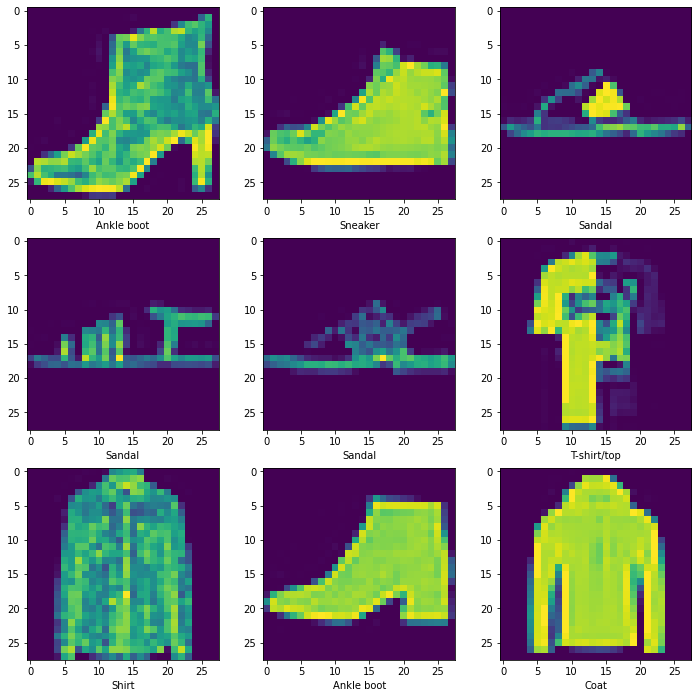

In [4]:
# Explore data visually
train_labels_categorical = ['T-shirt/top', 
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

plt.subplots(figsize=(12,12))
for i in range(1,10):
    random_item = random.randint(1, train_images_number)
    plt.subplot(3, 3, i)
    plt.xlabel(train_labels_categorical[train_labels[random_item]])
    plt.imshow(train_images[random_item])

## Step 2: Prepare data and understand some more
In this step, we perform the necessary transformations on the data so that the neural network would be able to understand it. Real-world datasets are complex and messy. For our purposes, most of the datasets we work on in this series require minimal preparation.

In [5]:
# Normalise
train_images = train_images / 255.0
test_images = test_images / 255.0

## Step 3: Build, train, and evaluate neural network
First, we design the neural network, e.g., sequence of layers and activation functions. It's good to explore the input values and the output values, and pay attention to the purposes of the functions used.

Second, we train the neural network, we iteratively make a guess, calculate how accurate that guess is, and enhance our guess. The first guess is initialised with random values. The goodness or badness of the guess is measured with the loss function. The next guess is generated and enhanced by the optimizer function.

Lastly, we apply use the neural network on previously unseen data and evaluate the results.

Let's add a sequence of layers. 
* In the input layer, let's use flatten to convert the square images to a 1-dimensional set. 
* In the hidden layer, let's use the relu function so that the neuron only returns a value if it's greater than zero. 
* In the output layer, let's use the softmax function so that we pick only the biggest number in a set, like so: 
    [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], --> [0,0,0,0,1,0,0,0,0] 

Let's explore the input and output values, and the functions in between.
* Our model takes in a 28 by 28 picture and then outputs 1 of 10 classes or labels, each representing an item of clothing in our dataset. 
* In between, we have 128 functions. Each one has its own parameters. We feed the input, which in this example are the pixels of an article of clothing, to each function. We combine their outputs to determine  what class the input belongs to, or in this example, what type of clothing article we are looking at.


In [6]:
# Build and train neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile  neural network
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

# Train the  neural network
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4897 - accuracy: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3656 - accuracy: 0.8663
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3301 - accuracy: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3111 - accuracy: 0.8854
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2906 - accuracy: 0.8931


In [7]:
# Apply the neural network
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test loss: ', test_loss)
print('Test accuracy: %.2f' % (test_accuracy*100))

10000/10000 [==============================] - 1s 53us/sample - loss: 0.3432 - accuracy: 0.8756
Test loss:  0.34322311252355575
Test accuracy: 87.56


## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [Datasets and sources](https://github.com/jamiemorales/project-deep-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/